In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
customer_data = pd.read_csv(r'C:\Users\Lenovo\Desktop\myenv\Un-Supervised ML\Data\Mall_Customers.csv')

In [7]:
customer_data.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [8]:
customer_data.shape

(200, 5)

In [9]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
# getting some information about the data set 
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual income column and Spending Score column

In [16]:
x = customer_data.iloc[:,[3,4]].values

In [ ]:
print(x)

Chossing the number of cluster 

WCSS --> Within cluster some of square 
it help choose optimal cluster value

In [18]:
# finding WCSS value for different number of clusters
wcss = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,init = 'k-means++',random_state=42)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)

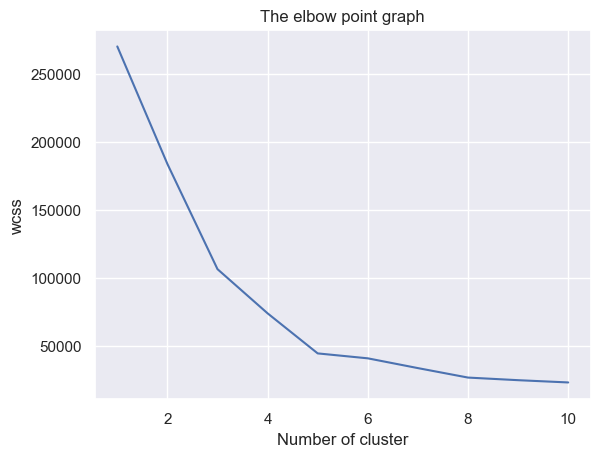

In [19]:
# plot an elbow graph 
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The elbow point graph")
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show()

Optimum Number of Cluster = 5

Training the k-means clustering model

In [20]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

# return a label for each data point based on their cluster

Y = kmeans.fit_predict(x)


5 cluster --> 0,1,2,3,4

In [21]:
# printing the cluster number
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


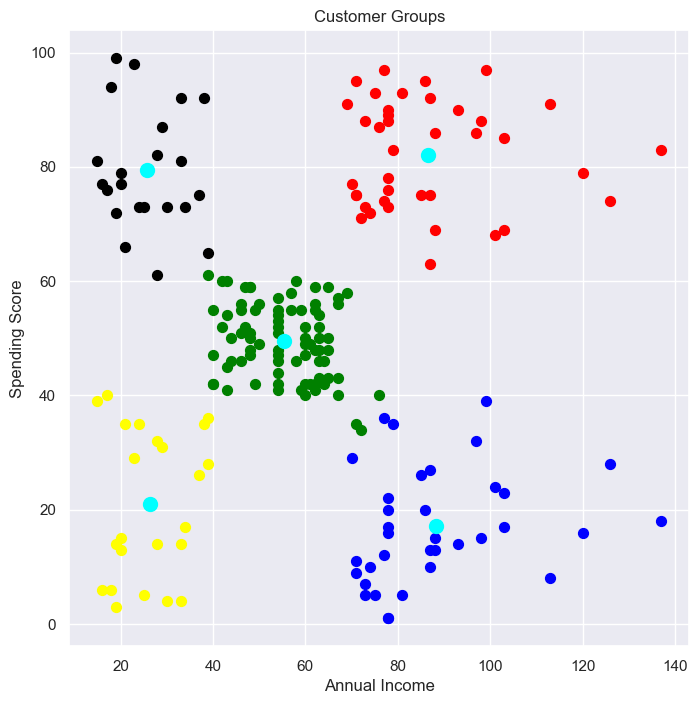

In [23]:
# visualizing the cluster
# plotting all the cluster and their centroid
plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0],x[Y==0,1],s = 50,c = 'green',label= 'Cluster1')
plt.scatter(x[Y==1,0],x[Y==1,1],s = 50,c = 'red',label= 'Cluster2')
plt.scatter(x[Y==2,0],x[Y==2,1],s = 50,c = 'blue',label= 'Cluster3')
plt.scatter(x[Y==3,0],x[Y==3,1],s = 50,c = 'yellow',label= 'Cluster4')
plt.scatter(x[Y==4,0],x[Y==4,1],s = 50,c = 'black',label= 'Cluster5')

# plot the centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label= 'Centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()